# Simulate Gaussian data and fit lin. reg.

In [1]:
import numpy as np
import pandas as pd

In [30]:
import matplotlib.pyplot as plt

In [97]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

In [3]:
x = [[1], [2], [3]]
y = [10, 20, 30]

model = LinearRegression()

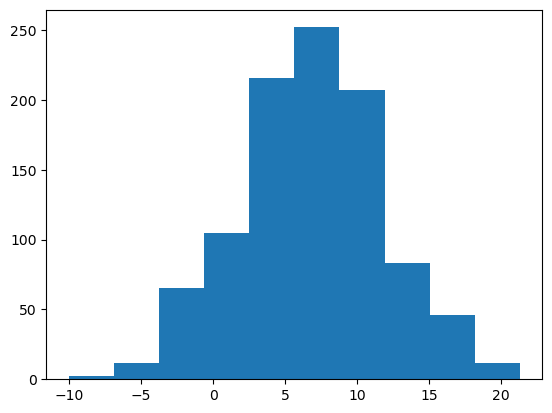

In [93]:
x = 7 + 5 * np.random.randn(1000)
plt.hist(x);
true_error = 0.3 * np.random.randn(1000)
intercept = 3
coeff = 1.5
y = intercept + coeff * x + true_error

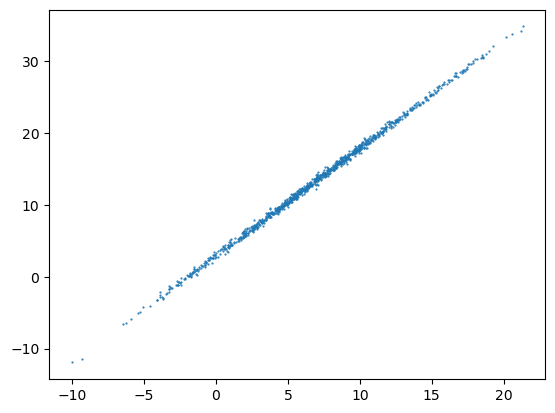

In [94]:
plt.scatter(x, y, s=0.3)

In [95]:
model.fit(x.reshape(-1,1), y)

LinearRegression()

In [98]:
y_pred = model.predict(x.reshape(-1, 1))

print(mean_squared_error(y, y_pred))
print(r2_score(y, y_pred))

0.08755907373165274
0.9984411509399103


# Add a Gamma distributed x_2

In [87]:
x2 = np.random.gamma(shape=5, scale=2, size=(1000))

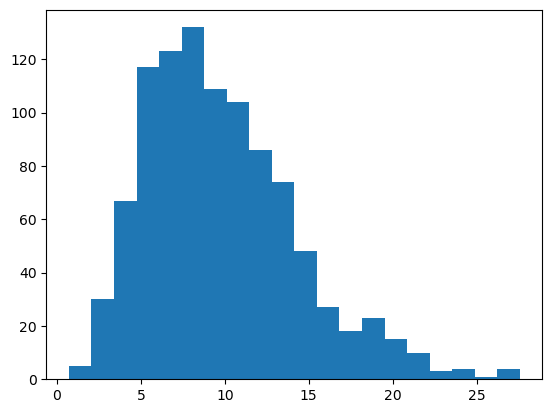

In [88]:
plt.hist(x2, bins=20);

In [121]:
x2_coeff = 0.7
y = intercept + coeff * x + x2_coeff * x2 + true_error

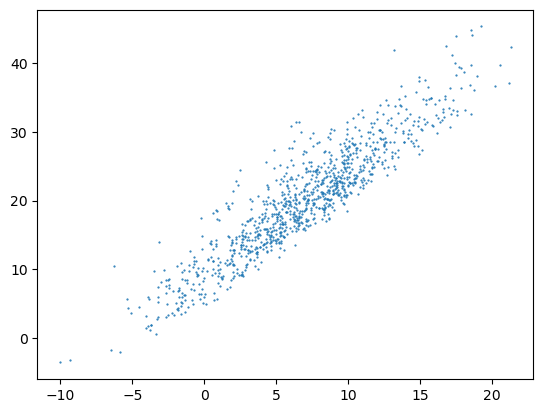

In [122]:
plt.scatter(x, y, s=0.3)

# Try three models: x1, x2, x1+x2

In [123]:
model.fit(x.reshape(-1,1), y)

model_x2 = LinearRegression()
model_x2.fit(x2.reshape(-1,1), y)

x1x2 = np.stack([x, x2]).T

model_x1x2 = LinearRegression()
model_x1x2.fit(x1x2, y)

LinearRegression()

In [134]:
x1x2.shape

(1000, 2)

In [125]:
y_pred1 = model.predict(x.reshape(-1,1))
y_pred2 = model_x2.predict(x2.reshape(-1,1))
y_pred3 = model_x1x2.predict(x1x2)

print("R^2 scores:")
print(r2_score(y, y_pred1))
print(r2_score(y, y_pred2))
print(r2_score(y, y_pred3))
print("MSE scores:")
print(mean_squared_error(y, y_pred1))
print(mean_squared_error(y, y_pred2))
print(mean_squared_error(y, y_pred3))



R^2 scores:
0.8468365851282069
0.13680388563047596
0.9986547828253587
MSE scores:
9.961466004443771
56.140683175924174
0.0874904438830894


# The model based on x2 is performing the poorest

## Let's check the estimated coefficients from every model

In [136]:
print("Estimated intercepts and coefficients")
print(model.intercept_, model.coef_)
print(model_x2.intercept_, model_x2.coef_)
print(model_x1x2.intercept_, model_x1x2.coef_)
print("True values:")
print(intercept, coeff, x2_coeff)

Estimated intercepts and coefficients
9.946304280604975 [1.48589935]
13.599701848014554 [0.66258644]
3.012587972150232 [1.49935677 0.69815938]
True values:
3 1.5 0.7


# Test the models for various sizes of training data

In [174]:
results_train = np.zeros((9, 3))
results_test = np.zeros((9, 3))

for train_size in range(100, 1000, 100):
    X_train, X_test = np.split(x1x2, [train_size])
    y_train, y_test = np.split(y, [train_size])
    
    train_data_lst = [X_train, X_train[:, 0:1], X_train[:, 1:2]]
    test_data_lst = [X_test, X_test[:, 0:1], X_test[:, 1:2]]

    for idx in range(len(train_data_lst)):
        train_data = train_data_lst[idx]
        test_data = test_data_lst[idx]
        model = LinearRegression()
        model.fit(train_data, y_train)
        y_train_pred = model.predict(train_data)
        y_test_pred = model.predict(test_data)
        
        mse_train = mean_squared_error(y_train, y_train_pred)
        mse_test = mean_squared_error(y_test, y_test_pred)
        
        results_train[int(train_size/100) - 1, idx] = mse_train
        results_test[int(train_size/100) - 1, idx] = mse_test

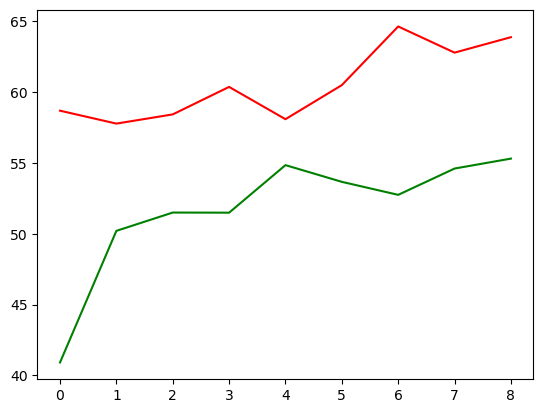

In [178]:
model_id = 2

plt.plot(np.arange(9), results_train[:, model_id], color="green");
plt.plot(np.arange(9), results_test[:, model_id], color="red");

In [160]:
np.arange(11)

array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10])

# Sklearn tutorial stuff

In [24]:
from sklearn.preprocessing import StandardScaler
X = [[0, 15],
     [1, -10],
     [2, -30],
     [3, -50]
    ]
StandardScaler().fit(X).transform(X)


array([[-1.34164079,  1.40177016],
       [-0.4472136 ,  0.36342189],
       [ 0.4472136 , -0.46725672],
       [ 1.34164079, -1.29793533]])

In [25]:
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.pipeline import make_pipeline
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
# create a pipeline object
pipe = make_pipeline(
    StandardScaler(),
    LogisticRegression()
)
# load the iris dataset and split it into train and test sets
X, y = load_iris(return_X_y=True)
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)
# fit the whole pipeline
pipe.fit(X_train, y_train)
# we can now use it like any other estimator
accuracy_score(pipe.predict(X_test), y_test)

0.9736842105263158

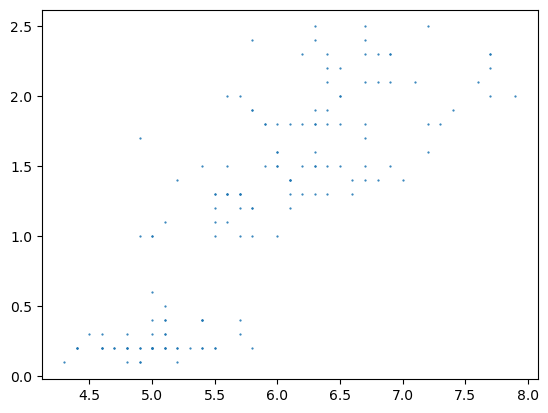

In [46]:
plt.scatter(x=X[:, 0], y=X[:, 3], s=0.3)

In [28]:
a = np.random.random(1000)

In [22]:
import matplotlib.pyplot as plt

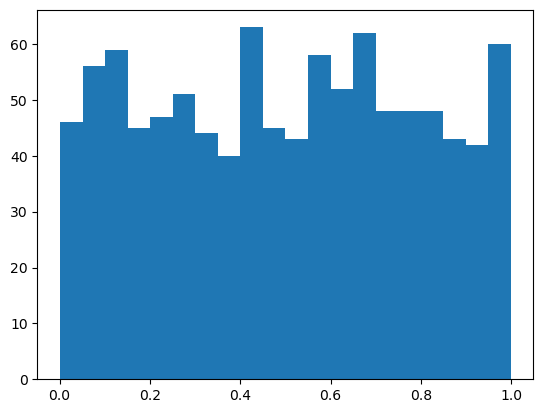

In [29]:
plt.hist(a, bins=20);

In [30]:
b = a * a

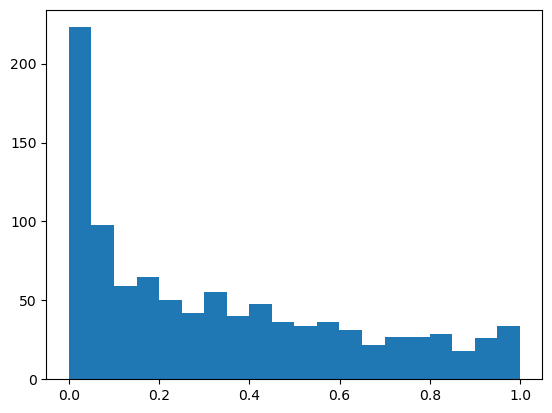

In [31]:
plt.hist(b, bins=20);

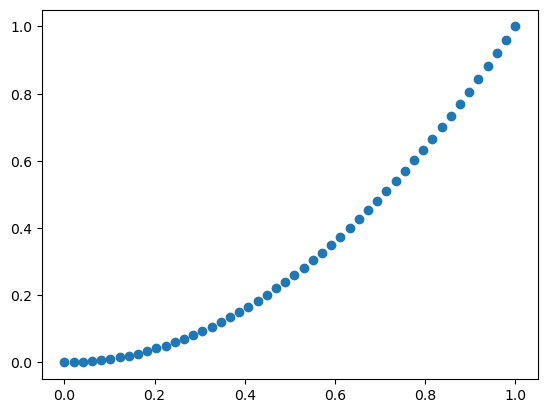

In [32]:
x = np.linspace(0, 1)
y = x * x

plt.scatter(x, y)

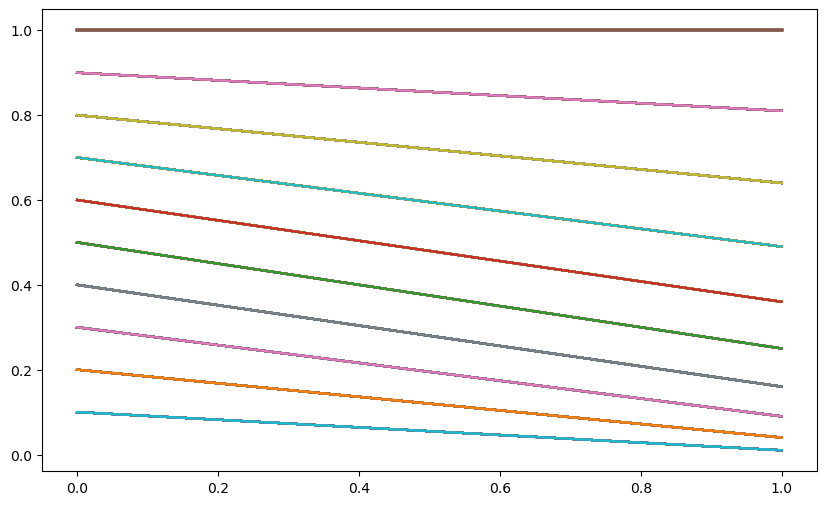

In [86]:

plt.figure(figsize=(10,6))
for pt1, pt2 in zip(a, b):
    plt.plot([0, 1], [pt1, pt2], linestyle="-")

In [84]:
k = 10
a = np.random.randint(1, k+1, 1000) / k

In [85]:
b = a*a

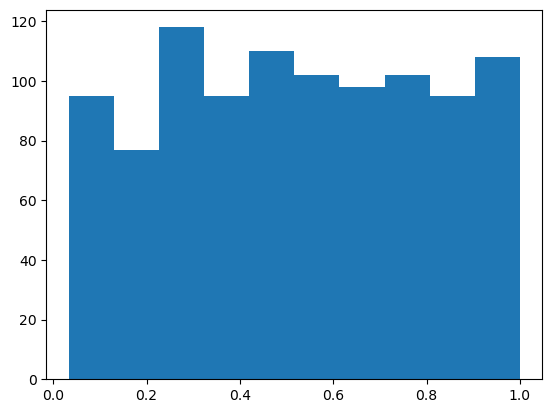

In [75]:
plt.hist(a);

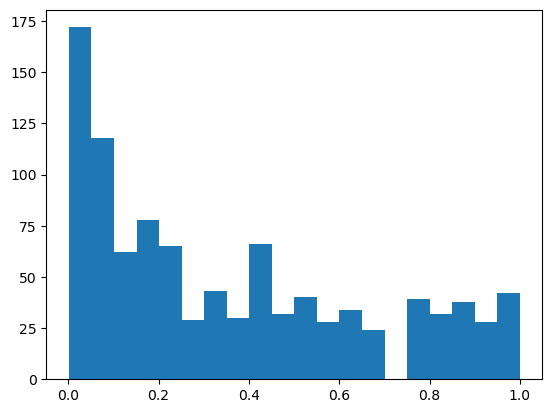

In [76]:
plt.hist(b, bins=20);

In [52]:
b

array([0.16, 1.  , 0.04, 0.36, 0.16, 1.  , 0.16, 0.04, 0.16, 1.  , 0.16,
       0.64, 0.04, 1.  , 0.64, 0.16, 1.  , 0.04, 0.04, 1.  , 0.64, 0.04,
       0.16, 0.36, 0.36, 0.04, 0.16, 0.64, 0.16, 1.  , 0.04, 0.04, 0.04,
       0.64, 0.16, 0.16, 1.  , 0.16, 0.64, 0.04, 0.16, 0.04, 1.  , 0.04,
       0.64, 1.  , 0.64, 0.16, 0.16, 0.16, 0.36, 1.  , 0.36, 0.16, 0.16,
       0.04, 0.04, 0.04, 0.04, 1.  , 1.  , 0.04, 0.36, 0.36, 0.16, 0.16,
       0.36, 1.  , 0.64, 0.36, 0.64, 0.64, 0.04, 0.36, 1.  , 0.64, 0.36,
       0.04, 0.16, 1.  , 0.64, 1.  , 0.36, 1.  , 0.04, 0.36, 0.16, 0.64,
       0.16, 0.16, 1.  , 0.16, 0.64, 1.  , 0.16, 0.16, 1.  , 0.16, 0.36,
       1.  , 0.16, 0.04, 0.64, 1.  , 0.16, 0.64, 0.04, 0.16, 0.16, 0.64,
       0.64, 0.36, 0.36, 0.64, 0.64, 0.64, 0.64, 0.04, 0.64, 0.16, 0.16,
       0.16, 0.16, 0.64, 0.04, 0.16, 1.  , 0.64, 0.36, 0.64, 0.04, 0.04,
       0.64, 1.  , 0.36, 0.36, 0.64, 0.16, 0.36, 0.64, 0.64, 1.  , 0.04,
       0.64, 0.16, 0.64, 0.04, 0.36, 0.04, 0.36, 1.